
The amount of the premium for a health insurance policy depends from person to person, as many factors affect the amount of the premium for a health insurance policy. Let’s say age, a young person is very less likely to have major health problems compared to an older person. Thus, treating an older person will be expensive compared to a young one. That is why an older person is required to pay a high premium compared to a young person.

Just like age, many other factors affect the premium for a health insurance policy. Hope you now have understood what health insurance is and how the premium for a health insurance policy is determined. In the section below, I will take you through the task of health insurance premium prediction with machine learning using Python.

Health Insurance Premium Prediction using Python
The dataset that I am using for the task of health insurance premium prediction is collected from Kaggle. It contains data about:

• Medical Charges: Total medical expense charged to the plan for the calendar year

• Age: Insurance contractor’s age, ranging from 18 to 64

• Sex: Insurance contractor’s gender, Male or Female

• BMI (Body Mass Index) = Body Mass Index, Weight(Kg)/( Height(m)² )

• Children: Number of children covered by the plan/ Number of dependants

• Region: The beneficiary’s residential area in the US. Northeast, Southeast, Northwest, Southwest

• Smoker: Whether the insurance contractor is a smoker or not, Yes or No

As mentioned, medical charges will be our dependent variable and the rest will be our independent variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
hdf = pd. read_csv('insurance.csv')

In [3]:
hdf.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
hdf.shape

(1338, 7)

In [5]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
hdf.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
hdf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
hdf['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [9]:
hdf['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
hdf.iloc[:,1] = labelencoder.fit_transform(hdf.iloc[:,1])
#hdf.iloc[:,5] = labelencoder.fit_transform(hdf.iloc[:,5])
hdf.iloc[:,4] = labelencoder.fit_transform(hdf.iloc[:,4])
hdf['region'] = hdf['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
hdf.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


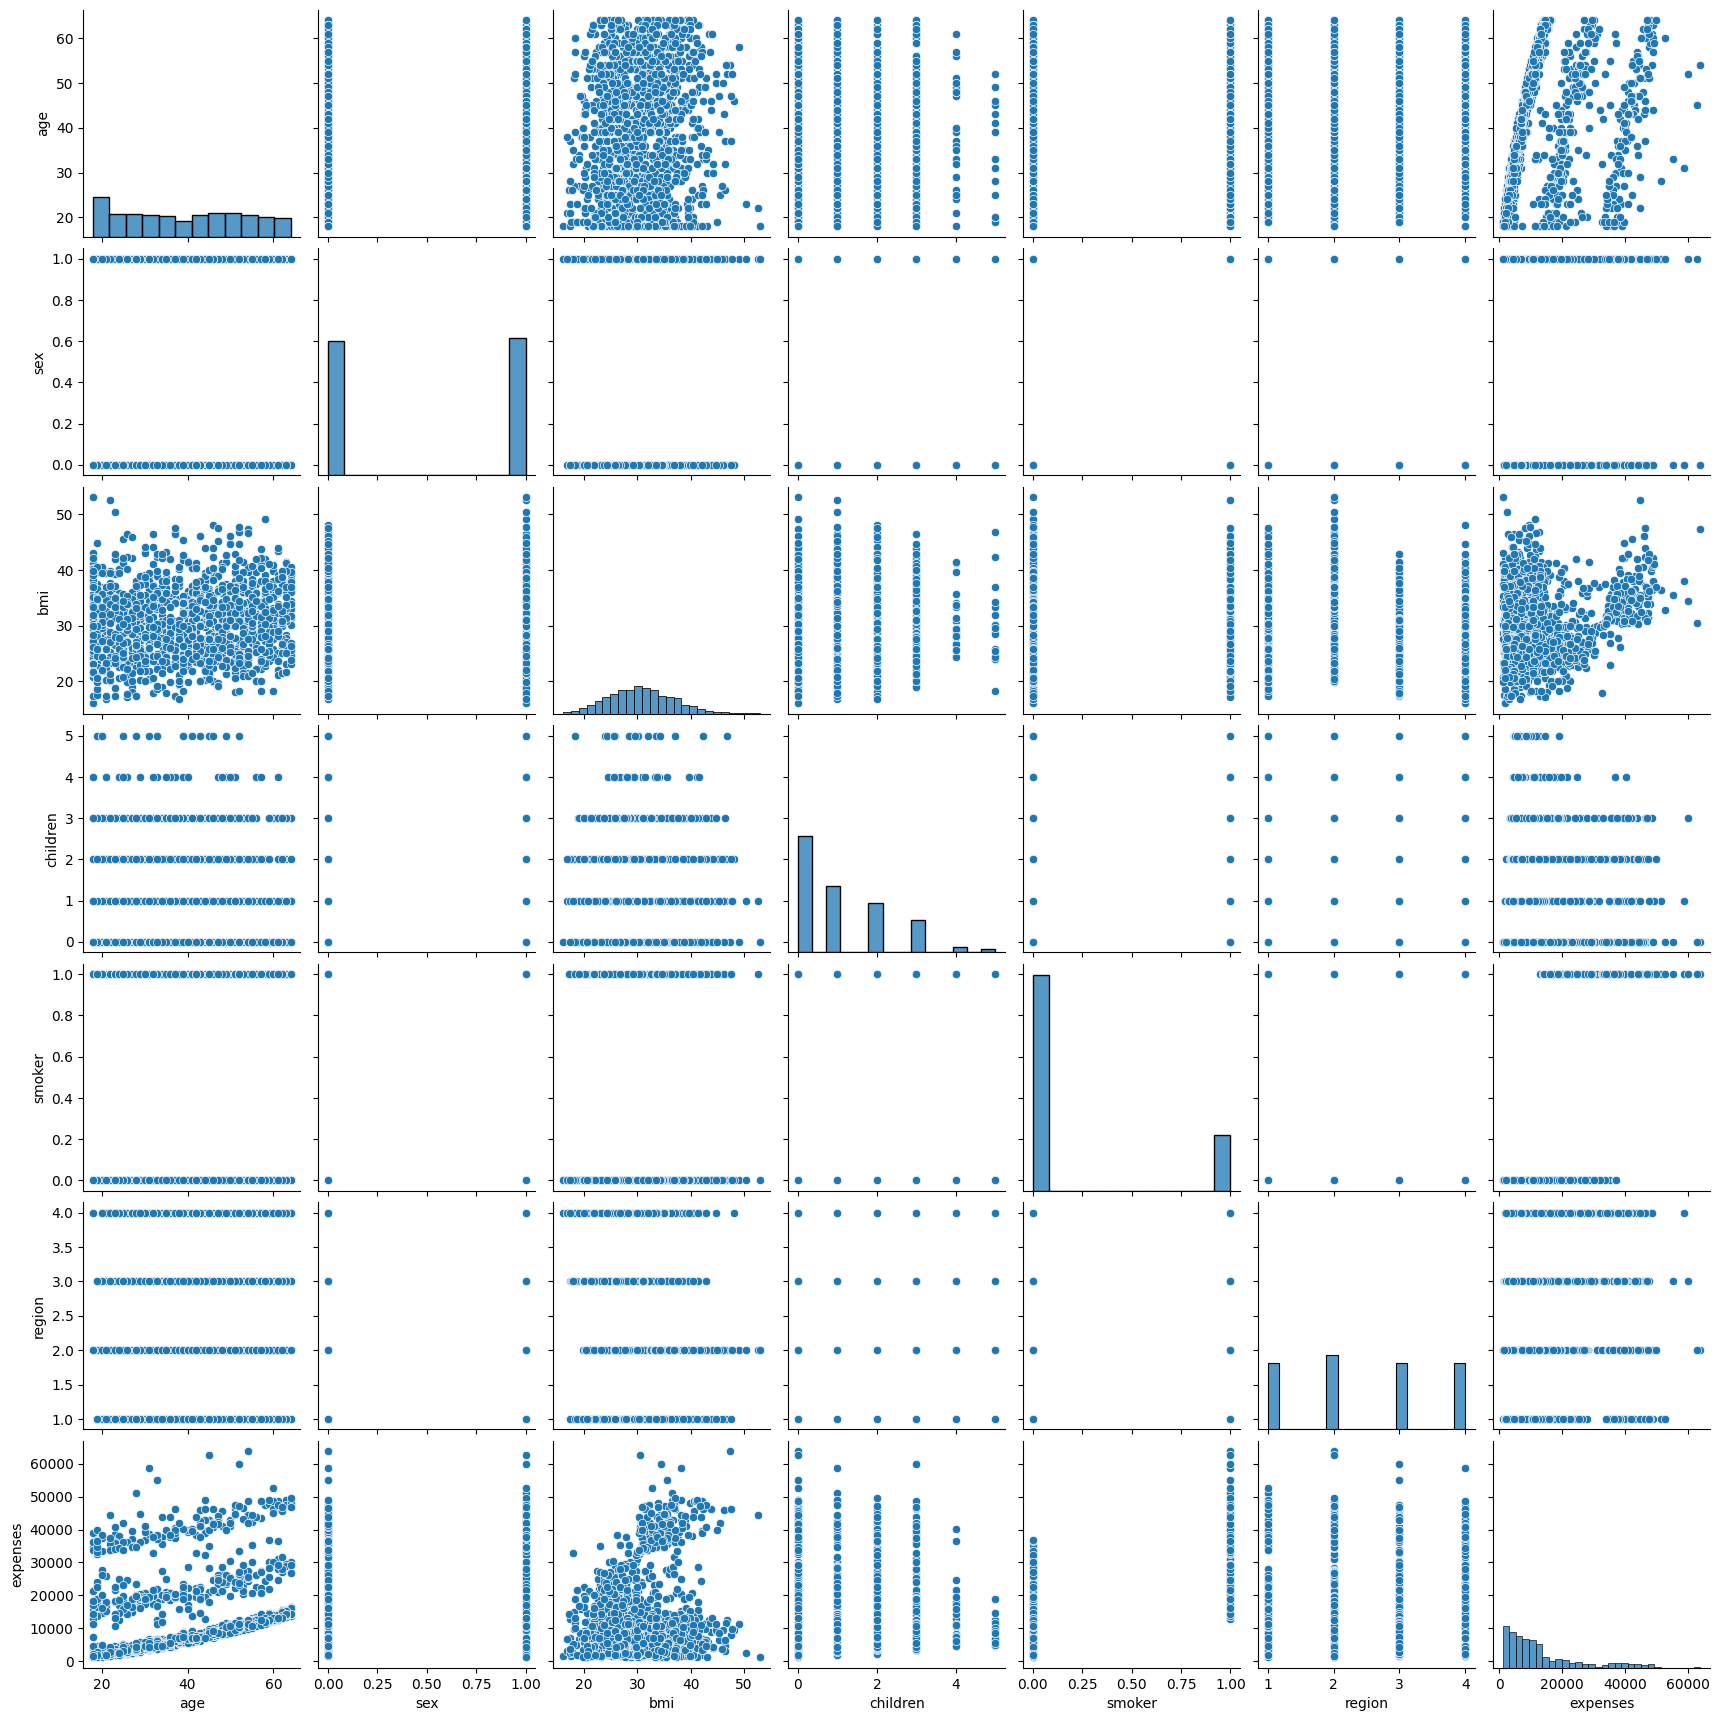

In [11]:
sns.pairplot(hdf)

<Axes: >

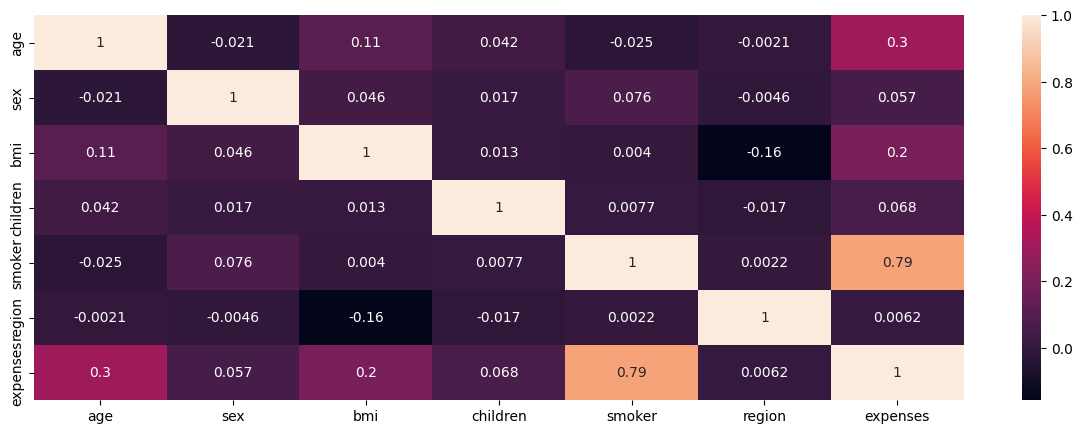

In [12]:
plt.figure(figsize =(15,5))
sns.heatmap(data=hdf.corr(), annot = True)

<Axes: xlabel='age', ylabel='Density'>

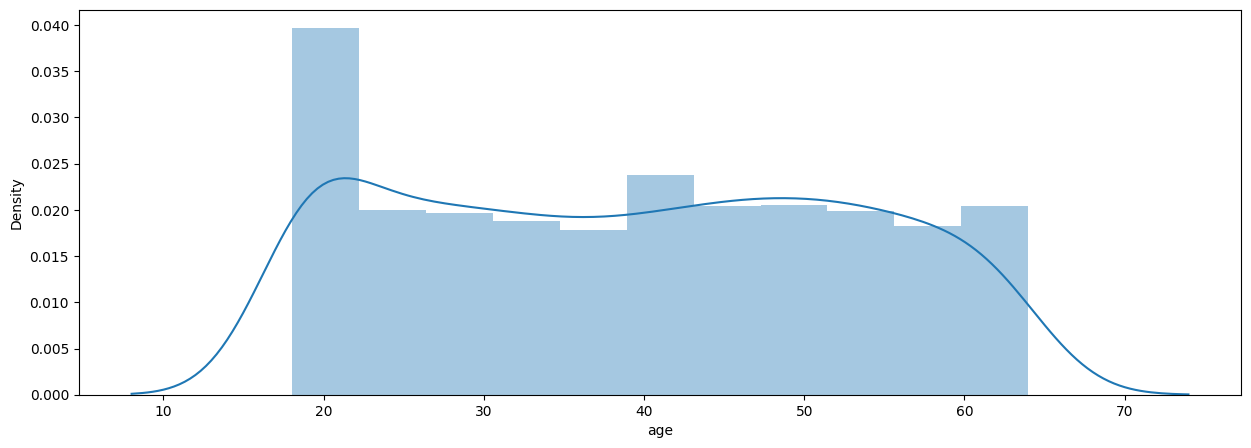

In [13]:
plt.figure(figsize =(15,5))
sns.distplot(hdf['age'])

<Axes: xlabel='children', ylabel='Density'>

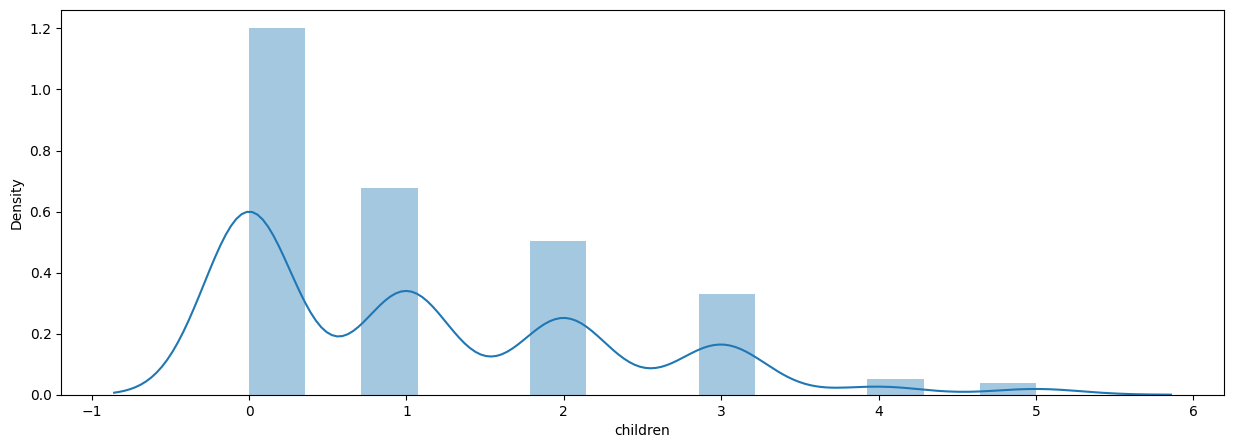

In [14]:
plt.figure(figsize =(15,5))
sns.distplot(hdf['children'])

<Axes: xlabel='expenses', ylabel='Density'>

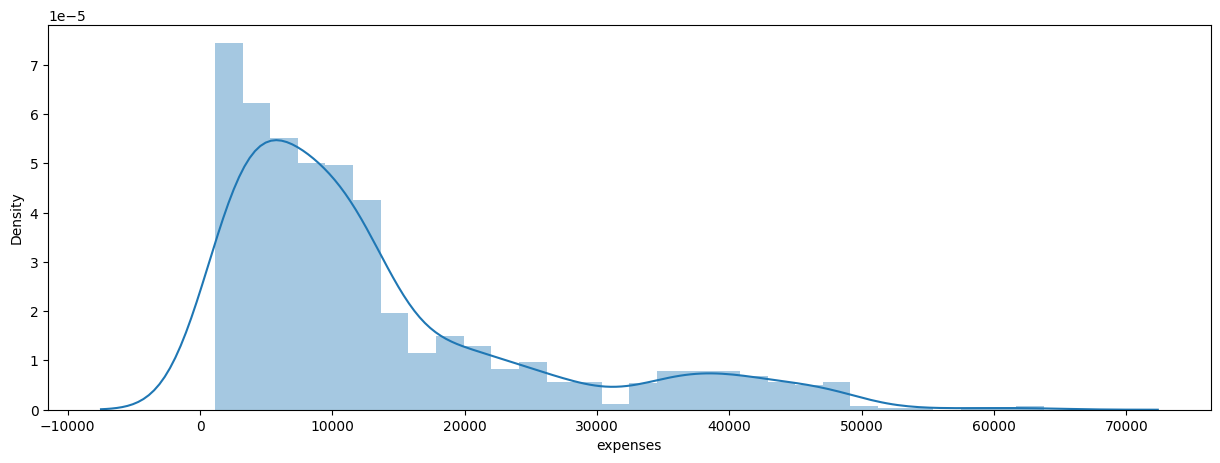

In [15]:
plt.figure(figsize =(15,5))
sns.distplot(hdf['expenses'])

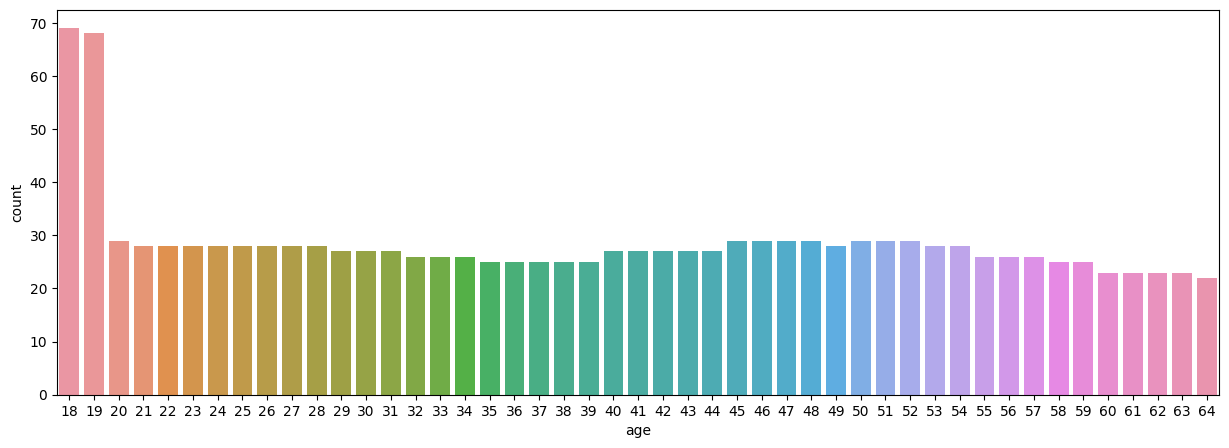

In [16]:
plt.figure(figsize =(15,5))
# create the countplot
sns.countplot(x='age', data= hdf)

# add labels and title
plt.xlabel('age')
plt.ylabel('count')
#plt.title('Title of the plot')

# show the plot
plt.show()

#plt.figure(figsize =(15,5))
#sns.countplot(hdf['age'])

<Axes: xlabel='children', ylabel='count'>

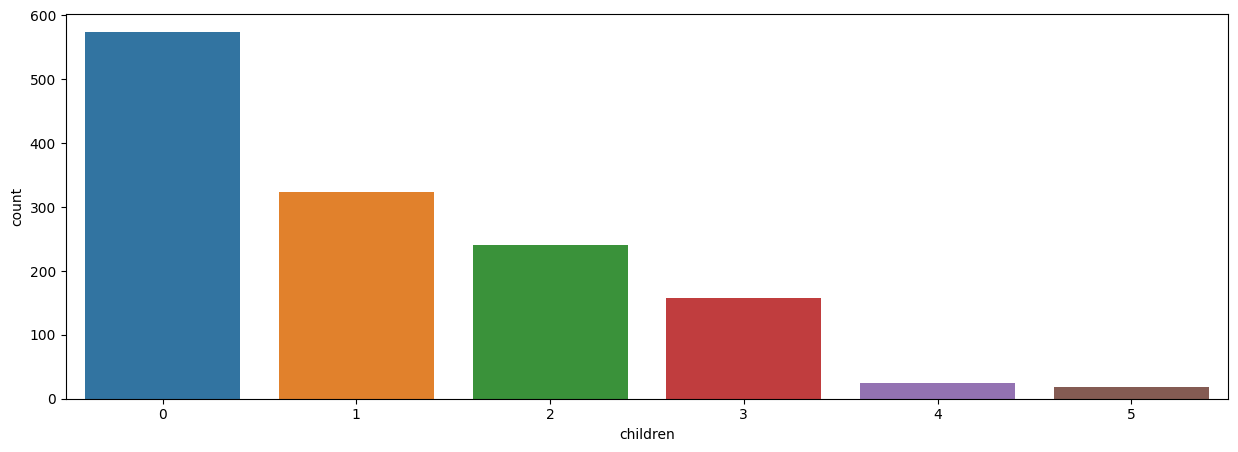

In [17]:
plt.figure(figsize =(15,5))
sns.countplot(x='children',data=hdf)
#plt.show()

<Axes: xlabel='sex', ylabel='count'>

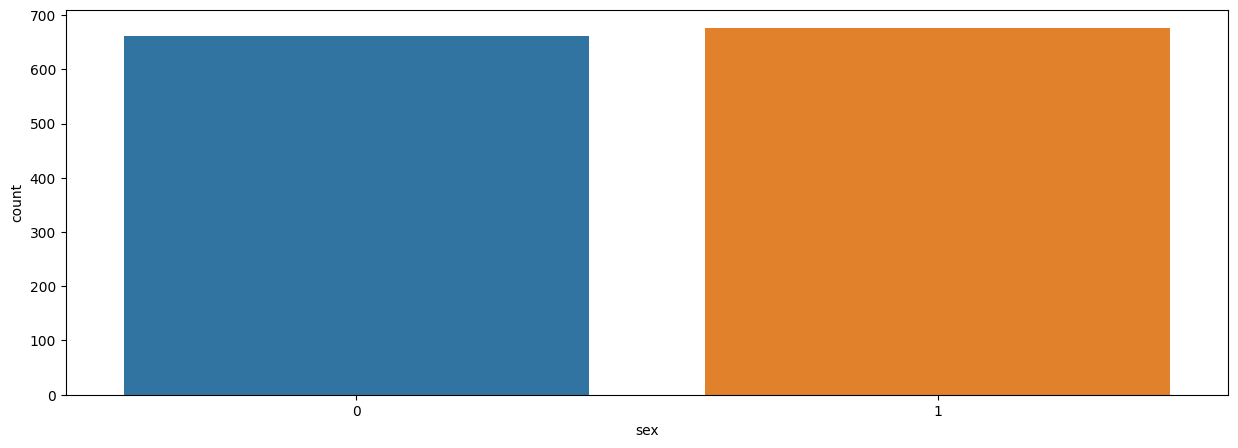

In [18]:
plt.figure(figsize =(15,5))
sns.countplot(x='sex', data = hdf)

<Axes: xlabel='smoker', ylabel='count'>

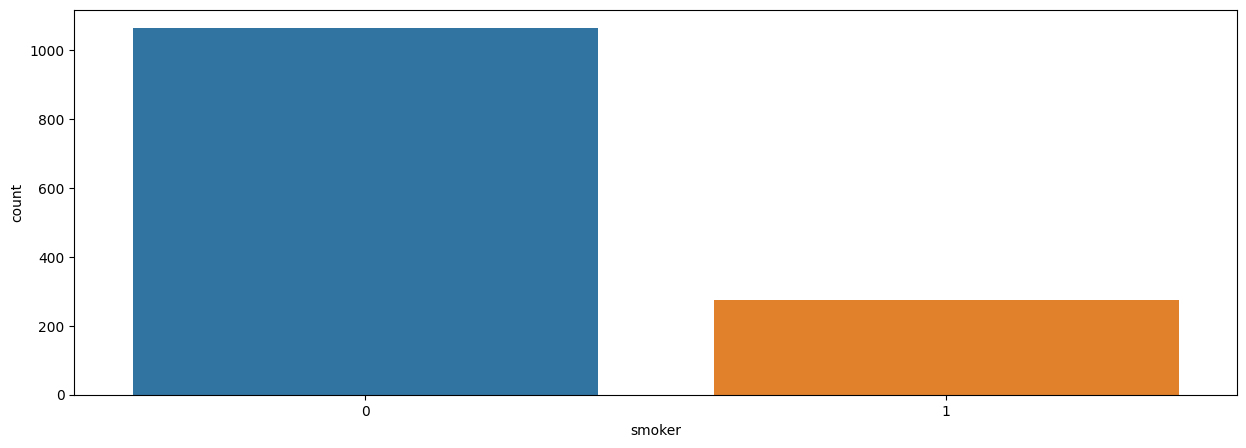

In [19]:
plt.figure(figsize =(15,5))
sns.countplot(x='smoker',data = hdf)

<Axes: xlabel='region', ylabel='count'>

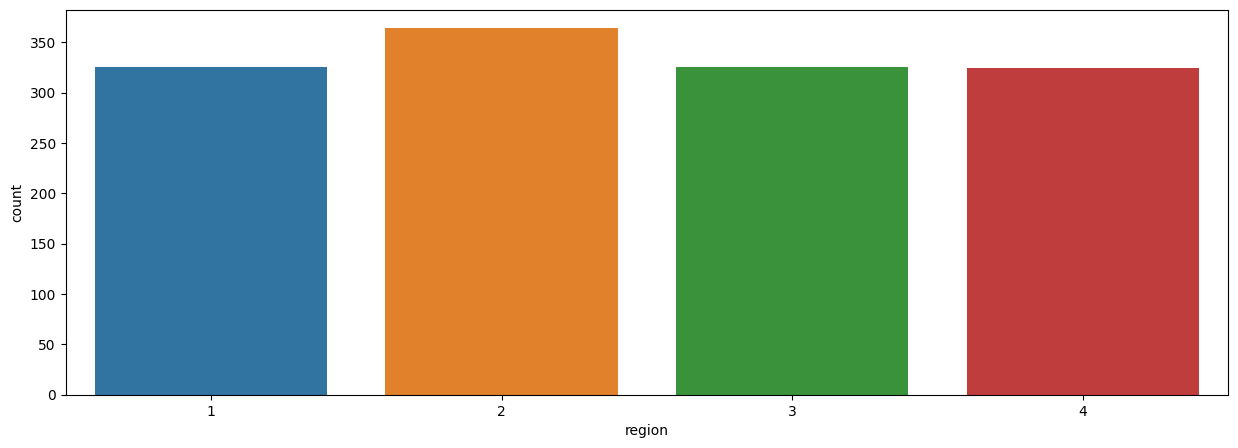

In [20]:
plt.figure(figsize =(15,5))
sns.countplot(x='region', data=hdf)

<Axes: ylabel='age'>

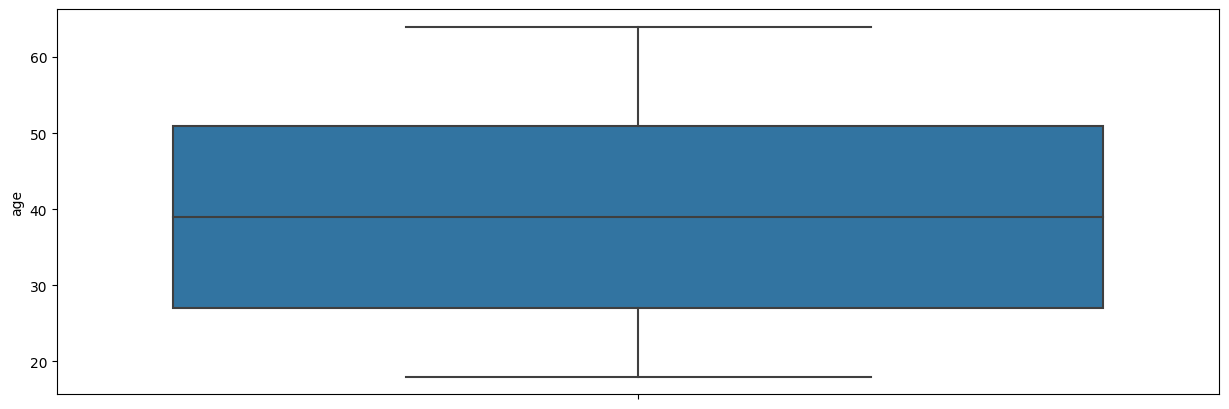

In [21]:
plt.figure(figsize =(15,5))
sns.boxplot(y = 'age', data = hdf)

<Axes: ylabel='bmi'>

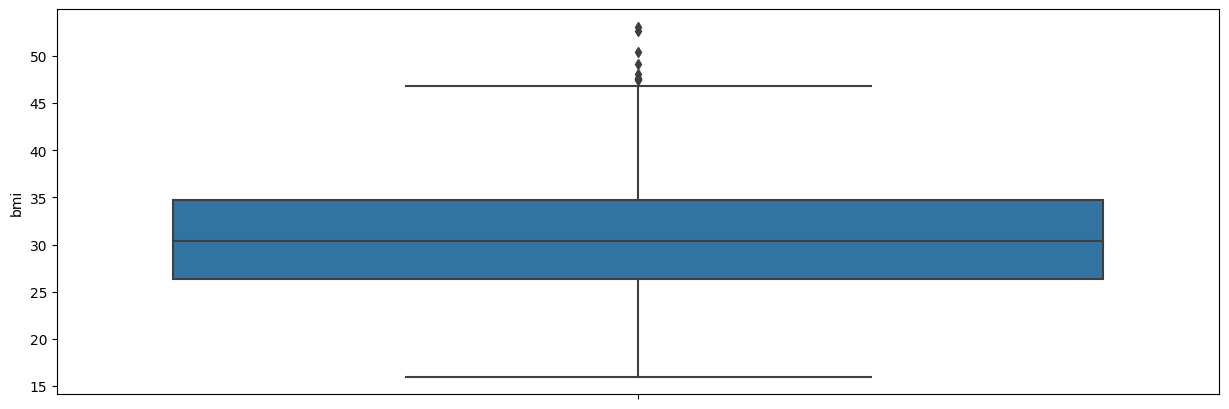

In [22]:
plt.figure(figsize =(15,5))
sns.boxplot(y = 'bmi', data = hdf)

<Axes: ylabel='expenses'>

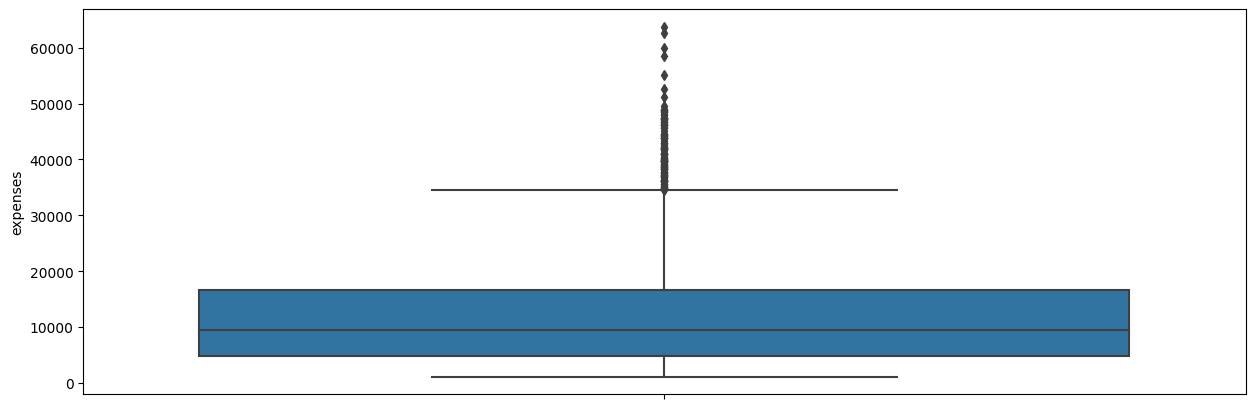

In [23]:
plt.figure(figsize =(15,5))
sns.boxplot(y = 'expenses', data = hdf)

In [24]:
hdf

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,3,10600.55
1334,18,0,31.9,0,0,4,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,1,2007.95


In [25]:
X = hdf.drop(['expenses'],axis=1)
Y=hdf['expenses']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [27]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [28]:
Y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()


In [30]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [31]:
y_predict_dtr = dtr.predict(X_test)

In [32]:
mse_dtr = mean_squared_error(y_test,y_predict_dtr,squared=False)
mse_dtr

6183.231381990314

In [33]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor()

In [34]:
xgb_r.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [35]:
y_predict_xg = xgb_r.predict(X_test)

In [36]:
mse_xgbr = mean_squared_error(y_test,y_predict_xg,squared=False)
mse_xgbr

5137.752138941659

In [37]:
r2_score_xg = r2_score(y_test,y_predict_xg)
r2_score_xg

0.8199718912959177

In [38]:
r2_score_dtr = r2_score(y_test,dtr.predict(X_test))
r2_score_dtr

0.7392495788641892

In [39]:
from sklearn.linear_model import LinearRegression
linearregressor = LinearRegression()


In [40]:
#cross_val_score(regressor, X_train, y_train, cv=10)
linearregressor.fit(X_train, y_train)


LinearRegression()

In [41]:
y_predict_lr = linearregressor.predict(X_test)


In [42]:
mse_lr = mean_squared_error(y_test,y_predict_lr,squared=False)
print(mse_lr)

5813.9817298424705


In [43]:
df1 = pd.DataFrame({'Actual':y_test,'DTR':y_predict_dtr,
                    'XGR':y_predict_xg,'LR':y_predict_lr})
df1

,Actual,DTR,XGR,LR
764,9095.07,8604.48,9426.722656,8938.656851
887,5272.18,5469.01,8272.622070,7062.787354
890,29330.98,28950.47,29033.316406,36939.995651
1293,9301.89,9500.57,8610.205078,9580.973660
259,33750.29,34303.17,33559.363281,27000.270665
...,...,...,...,...
701,9541.70,9875.68,12101.625000,16117.004611
672,4399.73,3935.18,6576.469238,6743.155522
1163,2200.83,2196.47,5030.105469,2059.594911
1103,11363.28,11743.93,10789.012695,14704.031818


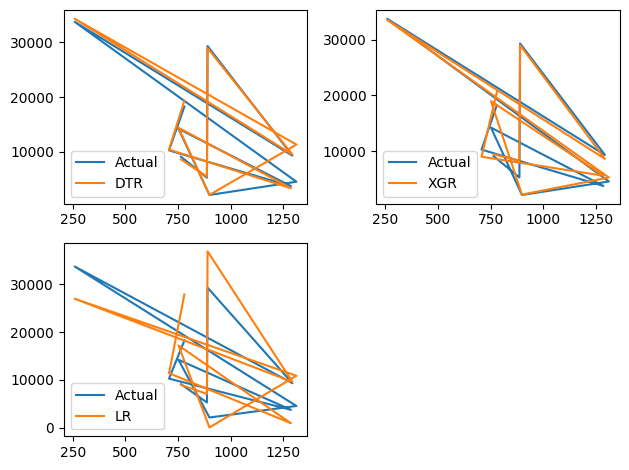

In [44]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['DTR'].iloc[0:11],label='DTR')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['XGR'].iloc[0:11],label='XGR')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['LR'].iloc[0:11],label='LR')
plt.legend()
plt.tight_layout()

In [45]:
r2_score_xg = r2_score(y_test,y_predict_xg)
r2_score_dtr = r2_score(y_test,dtr.predict(X_test))
r2_score_lr = r2_score(y_test,y_predict_lr)


In [46]:
print(r2_score_xg,r2_score_dtr,r2_score_lr)

0.8199718912959177 0.7392495788641892 0.7694626233326285


In [47]:
mae_xg = mean_absolute_error(y_test,y_predict_xg)
mae_dtr = mean_absolute_error(y_test,y_predict_dtr)
mae_lr = mean_absolute_error(y_test,y_predict_lr)

In [48]:
print(mae_xg,mae_dtr,mae_lr)

2879.3490251440553 2794.286766169154 4154.7003872579335


In [49]:
newdata = {'age':35,
          'sex':1,
          'bmi':82,
          'children':3,
          'smoker':1,
          'region':2}

df = pd.DataFrame(newdata,index=[0])
df


,age,sex,bmi,children,smoker,region
0,35,1,82,3,1,2


In [50]:
newdata_predict = xgb_r.predict(df)
print(newdata_predict)

[44347.18]


In [61]:
newdata1 = {'age':38,
          'sex':0,
          'bmi':46.7,
          'children':3,
          'smoker':0,
          'region':1}

df1 = pd.DataFrame(newdata1,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,38,0,46.70,3,0,1


In [62]:
newdata1_predict = xgb_r.predict(df1)
print(newdata1_predict)

[5019.614]


In [51]:
#import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle

lazy_reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:41<00:00,  1.01it/s]


In [52]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.86,0.86,4461.71,0.14
LGBMRegressor,0.85,0.85,4615.77,0.15
RandomForestRegressor,0.85,0.85,4618.67,0.47
HistGradientBoostingRegressor,0.85,0.85,4624.44,0.73
BaggingRegressor,0.84,0.84,4817.91,0.06
ExtraTreesRegressor,0.83,0.84,4906.78,0.30
AdaBoostRegressor,0.83,0.83,4955.22,0.05
KNeighborsRegressor,0.82,0.83,5027.52,0.03
XGBRegressor,0.82,0.82,5144.10,0.14


In [53]:
#import pickle
#pickle.dump(linearregressor, open('model.pkl','wb'))

#Healthpredictionmodel = pickle.load(open('model.pkl','rb'))


In [54]:
xgb_r.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
import joblib
joblib.dump(xgb_r,'model_joblib_xgbr')

['model_joblib_xgbr']

In [56]:
model=joblib.load('model_joblib_xgbr')

In [57]:
model.predict(df)

array([45233.344], dtype=float32)

In [63]:
model.predict(df1)

array([5019.614], dtype=float32)

# GUI

In [66]:
from tkinter import *

In [67]:
import joblib


In [68]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
                        
    model = joblib.load('model_joblib_xgbr')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])

    Label(master,text='Insurance Cost').grid(row=7)
    Label(master,text = result).grid(row=8)
                        
master = Tk()
master.title("Insurance Cost Prediction")
label = Label(master,text ='Insurance Cost Prediction',bg='black',
              fg='white').grid(row = 0,columnspan = 2)

Label(master,text='Enter Your Age').grid(row = 1)
Label(master, text = "Male Or Female [1/0]").grid(row=2)
Label(master, text = "Enter Your BMI value").grid(row=3)
Label(master, text = "Enter Number of Children").grid(row=4)
Label(master, text = "Smokers Yes/NO [1/0]").grid(row=5)
Label(master, text = "Region  [1-4]").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text='predict',command=show_entry).grid()
mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Temp\ipykernel_1944\2618451998.py", line 11, in show_entry
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py", line 1139, in predict
    return self.get_booster().predict(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 2137, in predict
    self._validate_dmatrix_features(data)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 2747, in _validate_dmatrix_features
    self._validate_features(fn)
  File "C:\Users\User\AppData\Local\Pro